# Análise Exploratória de Dados

## 1. Importando bibliotecas

In [67]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## 2. Carregando os dados

In [68]:
# Lê o arquivo csv e armazena em um dataframe
caminho = 'https://media.githubusercontent.com/media/Ciencia-de-Dados-IMT-2023/Datasets/main/Spotify-EDA/df_musics.csv'

df = pd.read_csv(caminho)
display(df.sample(5))

,id,id_album,id_artist,name,explicit,duration_ms,popularity,acousticness,danceability,energy,...,album_name,album_popularity,album_release_date,album_total_tracks,album_type,artist_name,artist_genres,artist_popularity,artist_type,artist_followers
3739,6XkuklKiHYVTlVvWlTgQYP,08eM9GRdr5BCCHNqS3Wwud,5K4W6rqBFWDnAN6FQUkS6x,Erase Me - Main,True,192253,72,0.0630,0.687,0.631,...,Man On The Moon II: The Legend Of Mr. Rager,75,2010-11-09,17,album,Kanye West,rap,90,artist,20146467
511,6gj08XDlv9Duc2fPOxUmVD,5W98Ab4VvQEuFEE4TIe5fE,6JL8zeS1NmiOftqZTRgdTz,Lips Are Movin,False,182666,73,0.0506,0.775,0.825,...,Title (Deluxe),80,2015-01-09,15,album,Meghan Trainor,pop,79,artist,13309433
19035,53CUl8RvJqbBPm31SiSg7Q,56P7aZkTGJGsYGe0DH7mqA,1RyvyyTE3xzB2ZywiAwp0i,(Bonus) Itchin,True,158933,45,0.0422,0.823,0.472,...,Astronaut Status,49,2012-01-17,21,album,Future,hip hop,90,artist,13936567
9776,3L6S3Px2rdU0HprDo2Famq,5GBcqixIFDPEom7AUNbFiM,73sIBHcqh3Z3NyqHKZ7FOL,Poke,True,216093,0,0.0176,0.460,0.768,...,Kauai,0,2014-10-03,7,album,Childish Gambino,hip hop,79,artist,10892680
7972,0YuePEX4KyfLIPMdNLPwgQ,3C2MFZ2iHotUQOSBzdSvM7,5INjqkS1o8h1imAzPqGZBb,Endors Toi,False,186640,58,0.0302,0.242,0.924,...,Lonerism,75,2012-01-01,12,album,Tame Impala,rock,81,artist,6546826


## 3. Tratar os Dados (Análise Quantitativa)

1. Excluir informações não relevantes
2. Tratar tipos da colunas
3. Tratar colunas com todos os valores vazios

### 3.1 Excluir informações não relevantes

In [69]:
print(df.columns)

Index(['id', 'id_album', 'id_artist', 'name', 'explicit', 'duration_ms',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'album_name',
       'album_popularity', 'album_release_date', 'album_total_tracks',
       'album_type', 'artist_name', 'artist_genres', 'artist_popularity',
       'artist_type', 'artist_followers'],
      dtype='object')


In [70]:
# Mantém uma base com os IDs e o nome das músicas
colunas_ids = ['id', 'id_album', 'id_artist', 'name']

df_ids = df.loc[:, colunas_ids]
display(df_ids.sample(5))

,id,id_album,id_artist,name
9820,1RT6zSjs59gJdFfUshT465,2wPnKggTK3QhYAKL7Q0vvr,7FBcuc1gsnv6Y1nwFtNRCb,Party Poison
9470,278jOl7gFMJ9WMnUbGxWRe,7k1YOwYf369EX0aHeXApWp,2UazAtjfzqBF0Nho2awK4z,Wicked Garden
23191,6rmtT7Y8cH7NpvovoPiV6k,4QLBuRlKOxUPE9BqIdHQyf,0DxeaLnv6SyYk2DOqkLO8c,Rude - Zedd Remix
13414,6SB2sufUkTTb3Ovjw6TELT,1eHyfkrIOVLGVnt5E4MD2j,0ZrpamOxcZybMHGg1AYtHP,Give It 2 U - Remix
17950,5qYGNYP5N1KjRBbcKTIgvk,6e8pwYKSF9iZjpPep1DVzx,0fA0VVWsXO9YnASrzqfmYu,The Return of Chip Douglas - Demo


In [71]:
# Remove as colunas de IDs

df_musicas = df.drop(columns=colunas_ids)
display(df_musicas.sample(5))

,explicit,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,album_name,album_popularity,album_release_date,album_total_tracks,album_type,artist_name,artist_genres,artist_popularity,artist_type,artist_followers
21606,False,223800,0,0.0992,0.645,0.830,0.000655,11,0.1280,-5.124,...,Young And Menace,0,2017-04-27,1,album,Fall Out Boy,rock,79,artist,10029586
11409,True,265013,46,0.1140,0.797,0.694,0.000000,10,0.2940,-4.469,...,I Changed A Lot (Deluxe),57,2015-10-23,16,album,DJ Khaled,hip hop,77,artist,9761280
8182,True,250773,48,0.1460,0.885,0.615,0.000000,8,0.0651,-6.714,...,I Am,54,2013-11-16,13,album,Jeezy,rap,70,artist,2339452
12128,False,261413,0,0.0339,0.802,0.556,0.000000,1,0.0958,-5.395,...,Raymond v Raymond,0,2010-03-29,14,album,Usher,rap,79,artist,10508757
1263,True,247013,48,0.0476,0.790,0.875,0.000000,7,0.3120,-6.550,...,B.O.A.T.S. II #METIME (Deluxe),46,2013-01-01,17,album,Pharrell Williams,pop,80,artist,4193703


### 3.2 Tratar tipos das colunas

In [72]:
dtypes = df_musicas.dtypes
linha_ex = df_musicas.iloc[1000]

tipos_colunas_df = pd.concat([dtypes, linha_ex], axis=1)
tipos_colunas_df.columns = ['dtype', 'exemplo']
display(tipos_colunas_df)

,dtype,exemplo
explicit,bool,False
duration_ms,int64,227821
popularity,int64,0
acousticness,float64,0.111
danceability,float64,0.797
energy,float64,0.792
instrumentalness,float64,0.000079
key,int64,6
liveness,float64,0.24
loudness,float64,-5.758


**Tratando coluna de album_release_date** 

Configurando tipo da coluna para datetime

In [73]:
df_musicas['album_release_date'] = pd.to_datetime(df_musicas['album_release_date'], format='%Y-%m-%d')
display(df_musicas['album_release_date'].sample(5))

7361    2012-01-01
21235   2017-05-05
16566   2017-03-02
14809   2003-08-18
27324   2012-09-18
Name: album_release_date, dtype: datetime64[ns]

**Tratando coluna de mode** 

Configurando tipo da coluna para boolean

In [74]:
df_musicas['mode'].unique()

array([0, 1], dtype=int64)

In [75]:
df_musicas['mode'] = df_musicas['mode'].astype('bool')
display(df_musicas['mode'].sample(5))

21856    False
24234    False
3049      True
6808      True
1936     False
Name: mode, dtype: bool

### 3.3 Tratar colunas com todos os valores vazios

In [76]:
print(df_musicas.isnull().sum())

explicit              0
duration_ms           0
popularity            0
acousticness          0
danceability          0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo                 0
time_signature        0
valence               0
album_name            0
album_popularity      0
album_release_date    0
album_total_tracks    0
album_type            0
artist_name           0
artist_genres         0
artist_popularity     0
artist_type           0
artist_followers      0
dtype: int64


##

## 4. Análise Exploratória e Tratamento de Outliers

1. Correlação entre as variáveis
2. Distribuição das variáveis
3. Tratamento de Outliers

### 4.1 Correlação entre as variáveis

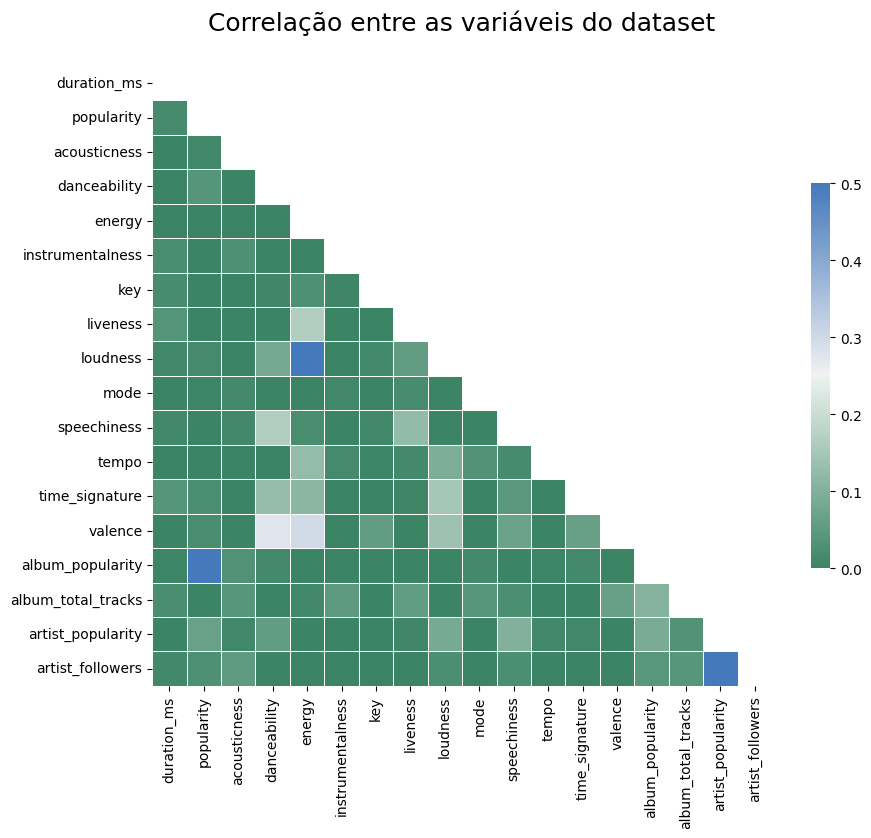

In [77]:
plt.figure(figsize=(10, 10))

colunas_nao_usadas = ['explicit']

mask = np.triu(np.ones_like(df_musicas.drop(columns=colunas_nao_usadas).corr(), dtype=bool))
cmap = sns.diverging_palette(150, 250, as_cmap=True)

sns.heatmap(
    df_musicas.drop(columns=colunas_nao_usadas).corr(), 
    mask=mask,
    square=True,
    vmin=0, 
    vmax=.5, 
    cmap=cmap,
    linewidths=.5,
    cbar_kws={"shrink": .5}
    )

plt.title('Correlação entre as variáveis do dataset\n', fontsize=18)
plt.show()

Com base nesse mapa de calor, nota-se que, naturalmente, a coluna de "album_popularity" (popularidade do album daquela música) está altamente correlacionada (92%) com "popularity" (popularidade da música). Da mesma forma que "artist_followers" (seguidores do artista) possui uma correlação de 65% com "artist_popularity" (popularidade do artista), o que também é esperado.

Além disso, é interessante notar que as seguintes _feature_ apresentaram certo grau de correlação

- loudness x energy (68%)
- valence x danceability (28%)
- valence x energy (30%)
- valence x loudness (14%)

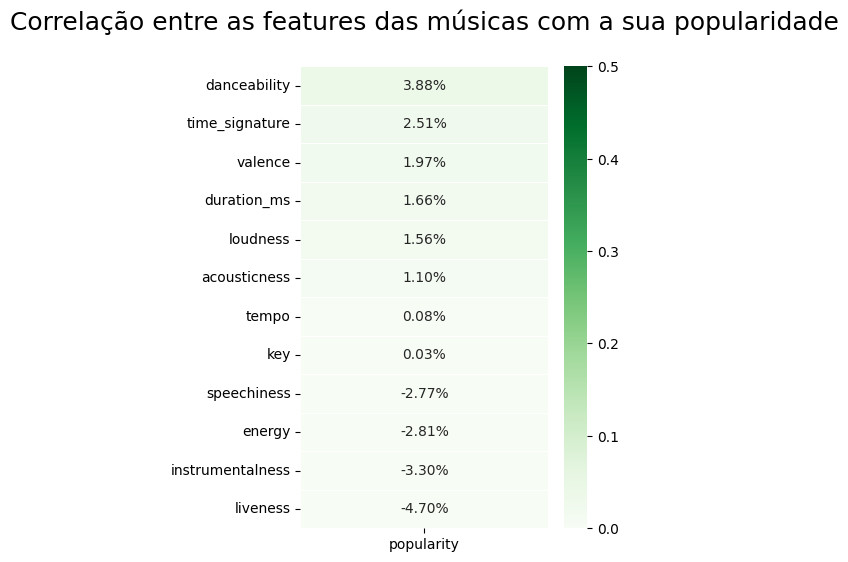

In [78]:
plt.figure(figsize=(4, 6))

colunas_nao_usadas = ['explicit', 'album_popularity', 'artist_popularity', 'artist_followers', 'album_total_tracks', 'mode']

sns.heatmap(
    df_musicas.drop(columns=colunas_nao_usadas).corr()[['popularity']].sort_values(by=['popularity'], ascending=False)[1:],

    annot=True, 
    vmin=0, 
    vmax=.5, 
    cmap='Greens',
    linewidths=.5,
    fmt='.2%'
    )


plt.title('Correlação entre as features das músicas com a sua popularidade\n', fontsize=18)
plt.show()

Análisando o gráfico acima, onde procurou encontrar alguma correlação entre as características da música e sua popularidade, nota-se que não há nenhuma regra geral para produzir uma música popular - todas as features apresentaram correlações próximas a zero.

In [79]:
generos_artistas = df_musicas['artist_genres'].unique()
print('Gêneros de artistas:', len(generos_artistas)	)

print(generos_artistas)

Gêneros de artistas: 7
['hip hop' 'r&b' 'rap' 'pop' 'rock' 'punk' 'reggae']


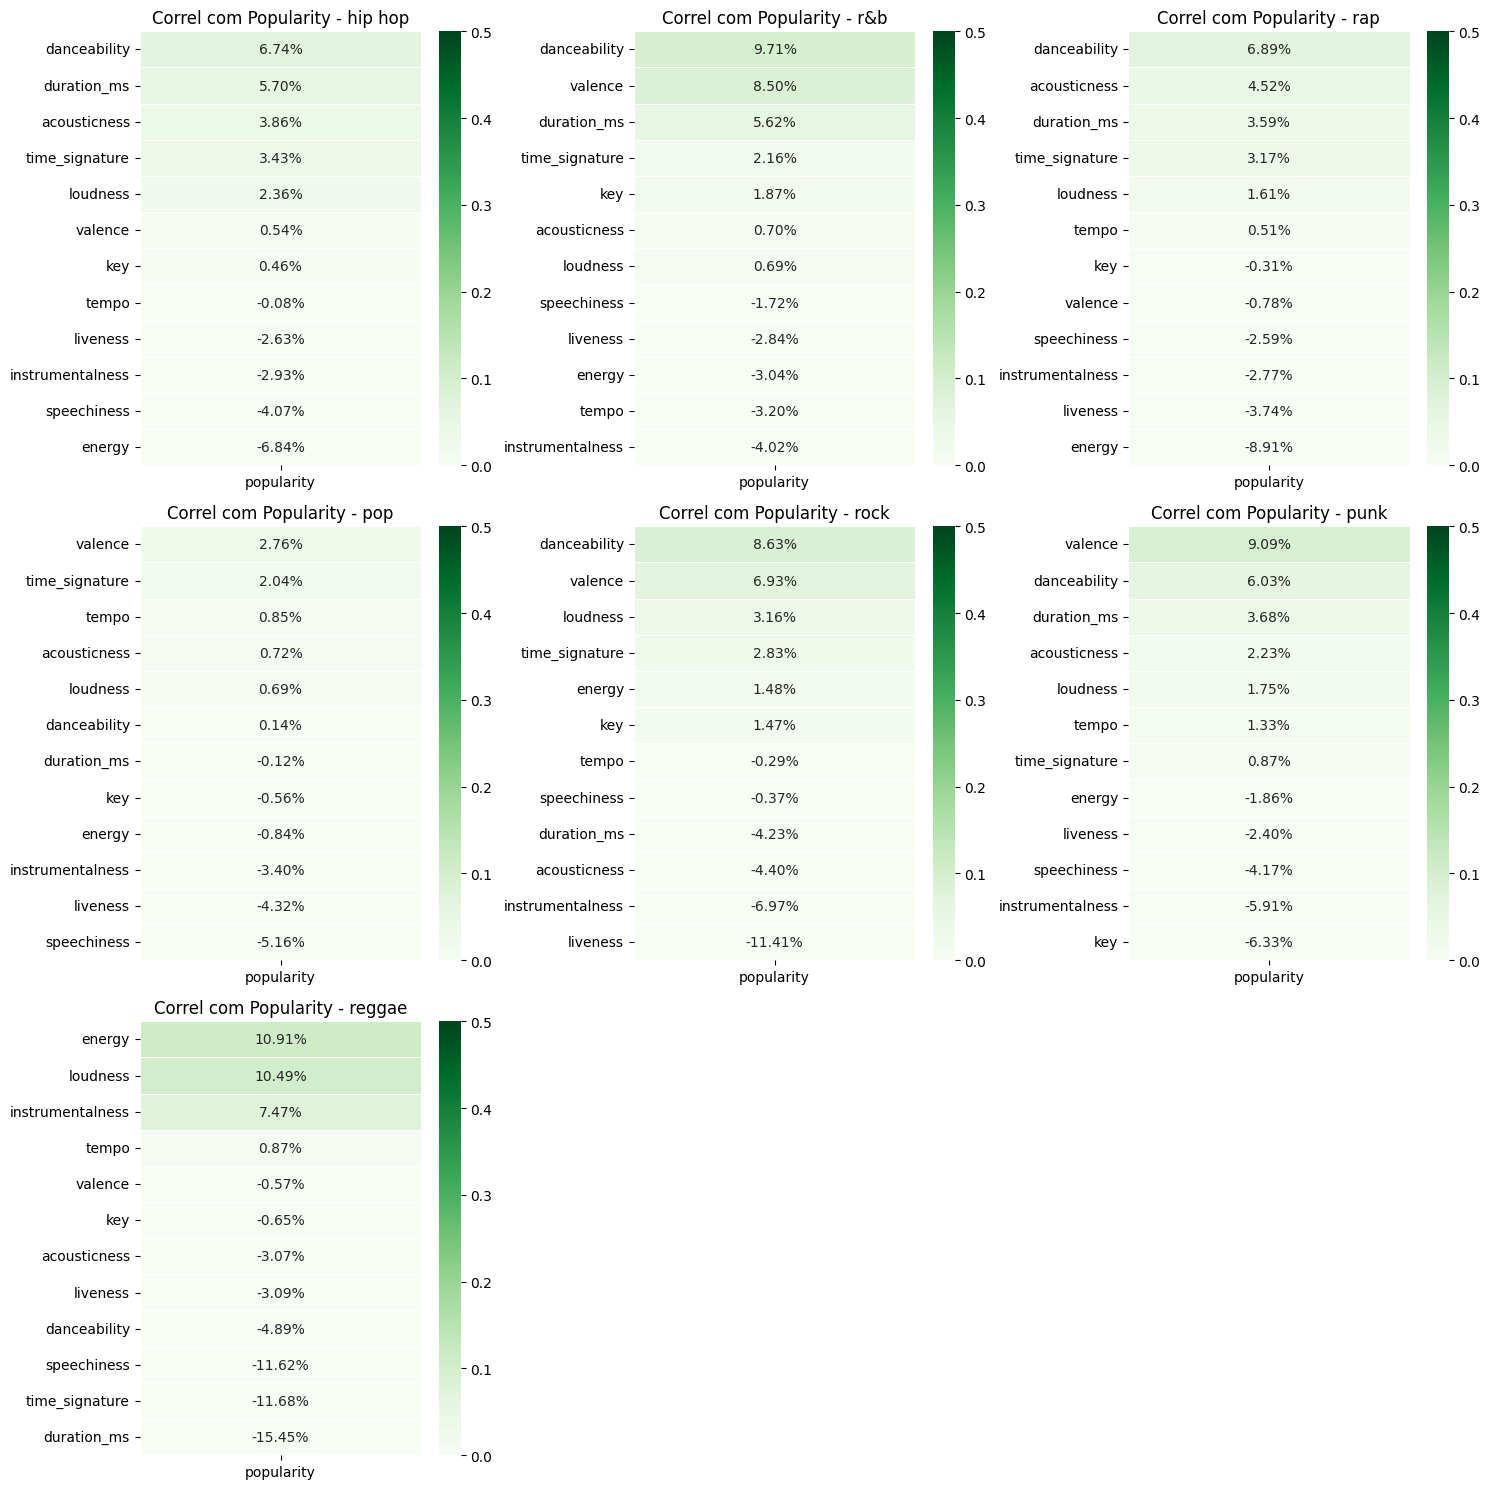

In [80]:
# Cálculo do tamanho da grid
num_plots = len(generos_artistas)
cols = math.ceil(math.sqrt(num_plots))
rows = math.ceil(num_plots / cols)

# Criação da grid de subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i, genero in enumerate(generos_artistas):
    df_genero = df_musicas[df_musicas['artist_genres'] == genero]
    correl = df_genero.drop(columns=colunas_nao_usadas).corr()[['popularity']].sort_values(by=['popularity'], ascending=False).drop('popularity')

    # Determinar o índice da subplot atual
    row_idx = i // cols
    col_idx = i % cols

    sns.heatmap(
        correl, 

        annot=True, 
        vmin=0, 
        vmax=.5, 
        cmap='Greens',
        linewidths=.5,
        fmt='.2%',
        ax=axes[row_idx, col_idx]
        
        )
    
    axes[row_idx, col_idx].set_title(f'Correl com Popularity - {genero}')

# Remover subplots vazios
if num_plots < rows * cols:
    for j in range(num_plots, rows * cols):
        fig.delaxes(axes.flatten()[j])

# Ajuste do espaçamento entre as subplots
plt.tight_layout()

# Exibição do gráfico
plt.show()

#TODO: Texto falando das conclusões do gráfico

### 4.2 Distribuição das variáveis

In [81]:
df_musicas.columns

Index(['explicit', 'duration_ms', 'popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'album_name',
       'album_popularity', 'album_release_date', 'album_total_tracks',
       'album_type', 'artist_name', 'artist_genres', 'artist_popularity',
       'artist_type', 'artist_followers'],
      dtype='object')

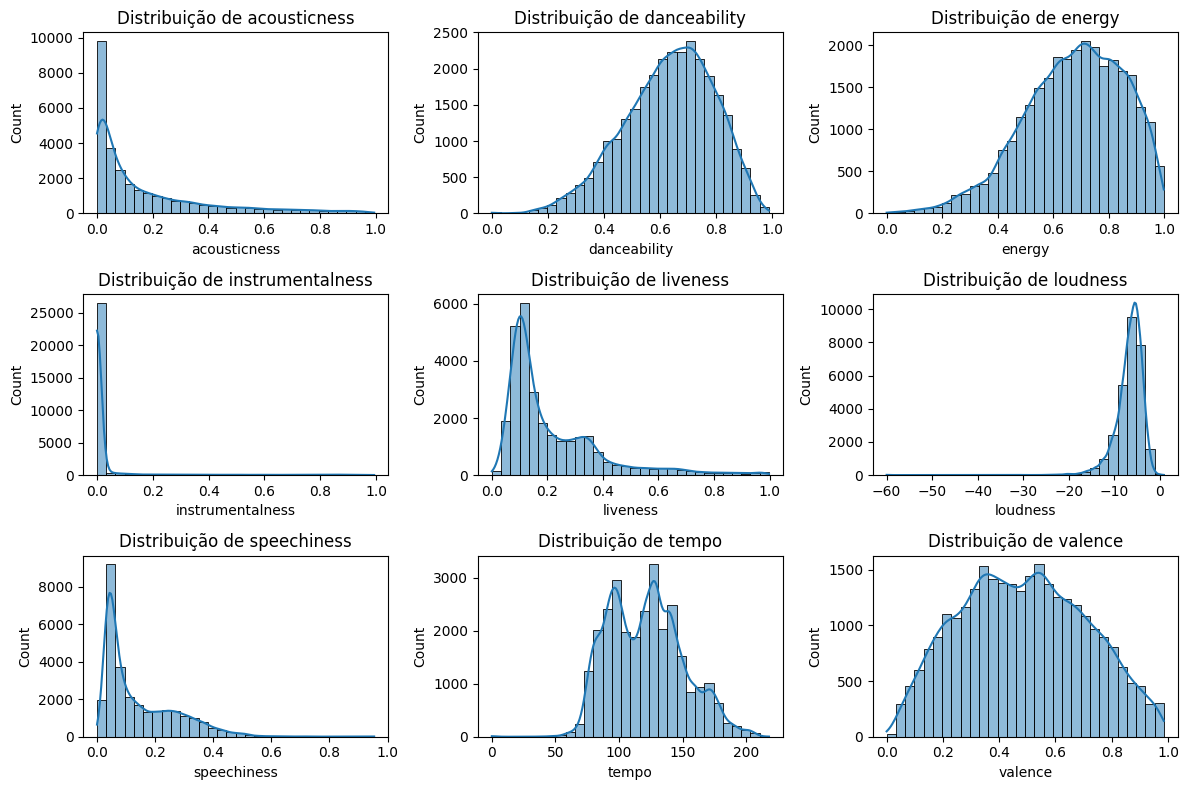

In [82]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Criação da grid de subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, feature in enumerate(features):

    # Determinar o índice da subplot atual
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(
        df_musicas[feature], 
        kde=True,
        ax=axes[row_idx, col_idx],
        bins=30
        )
    
    axes[row_idx, col_idx].set_title(f'Distribuição de {feature}')


# Ajuste do espaçamento entre as subplots
plt.tight_layout()

# Exibição do gráfico
plt.show()

Vamos ver como as distribuições variam conforme os diferentes gêneros musicais.

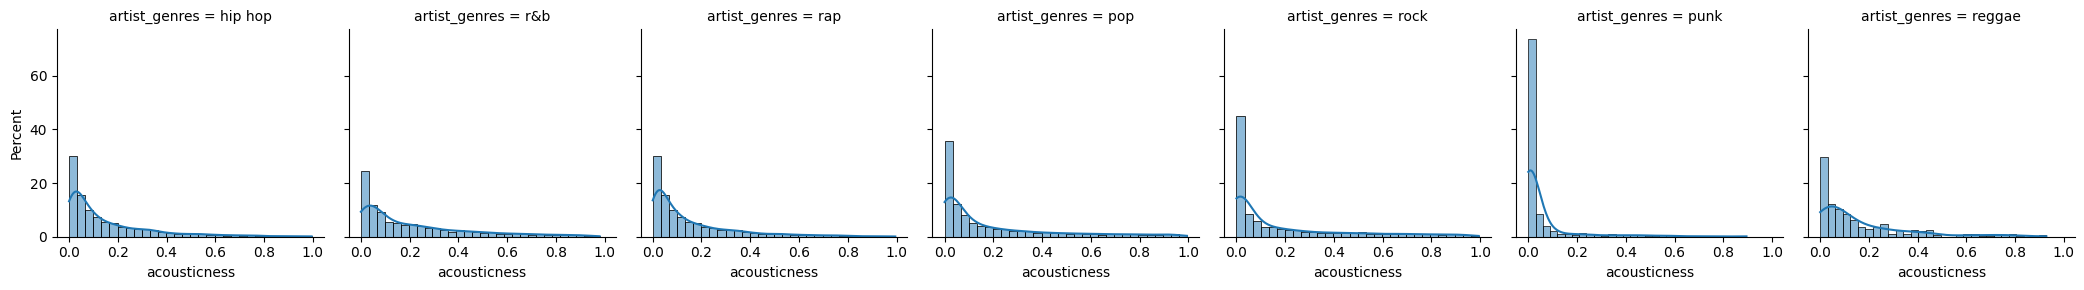

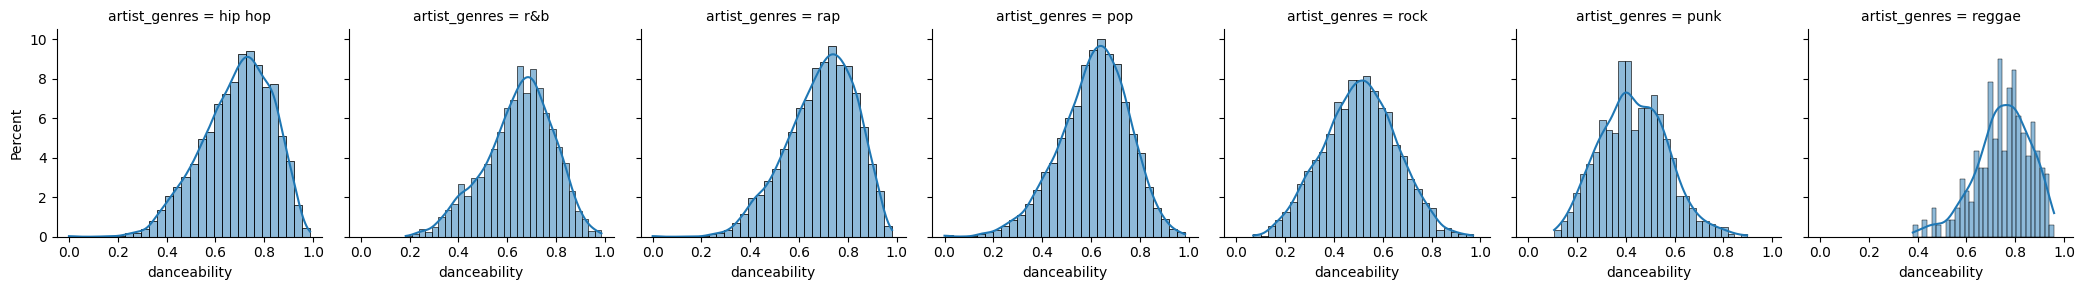

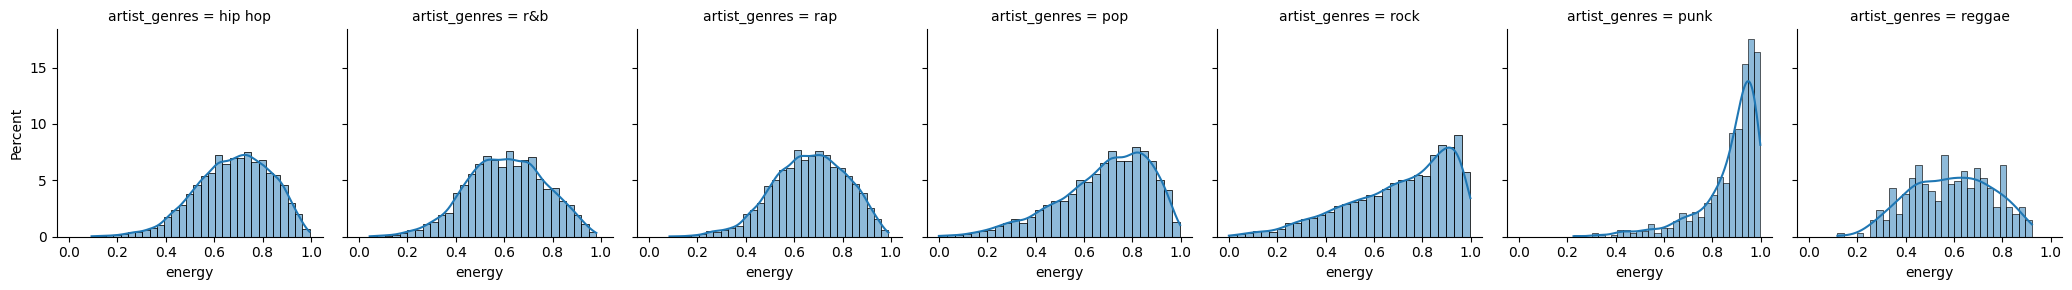

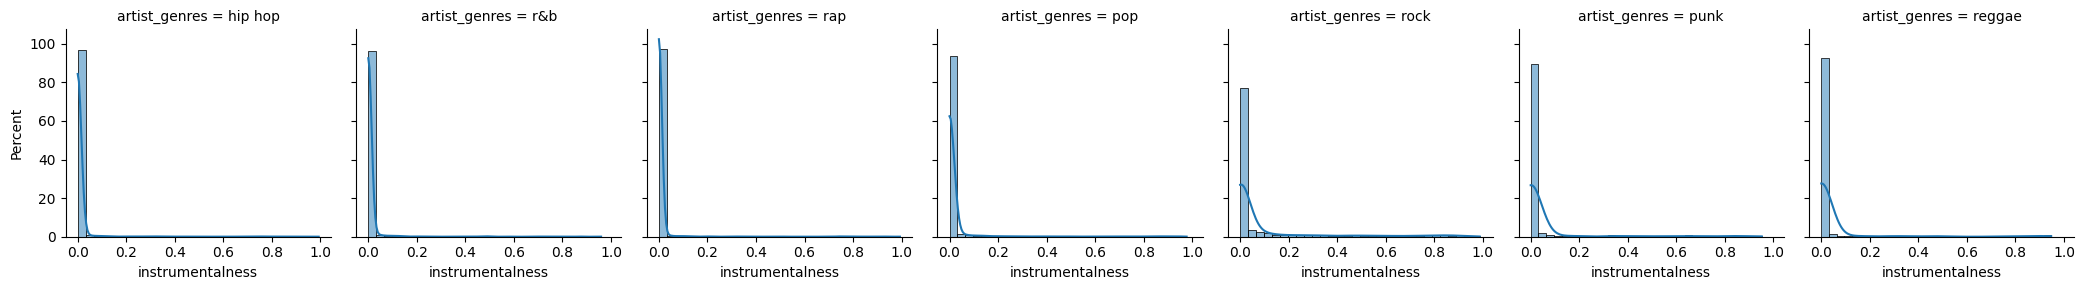

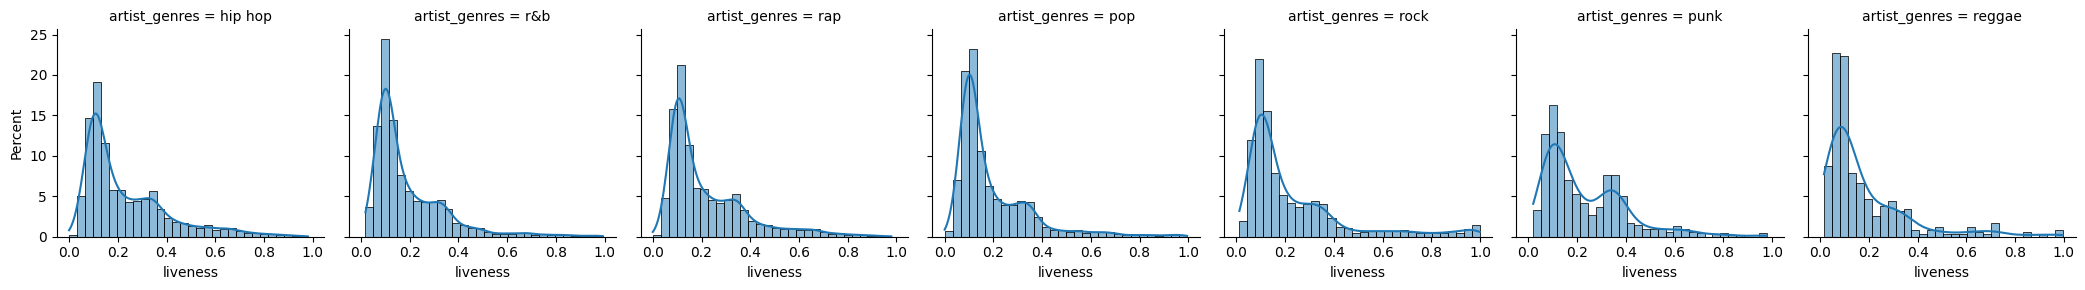

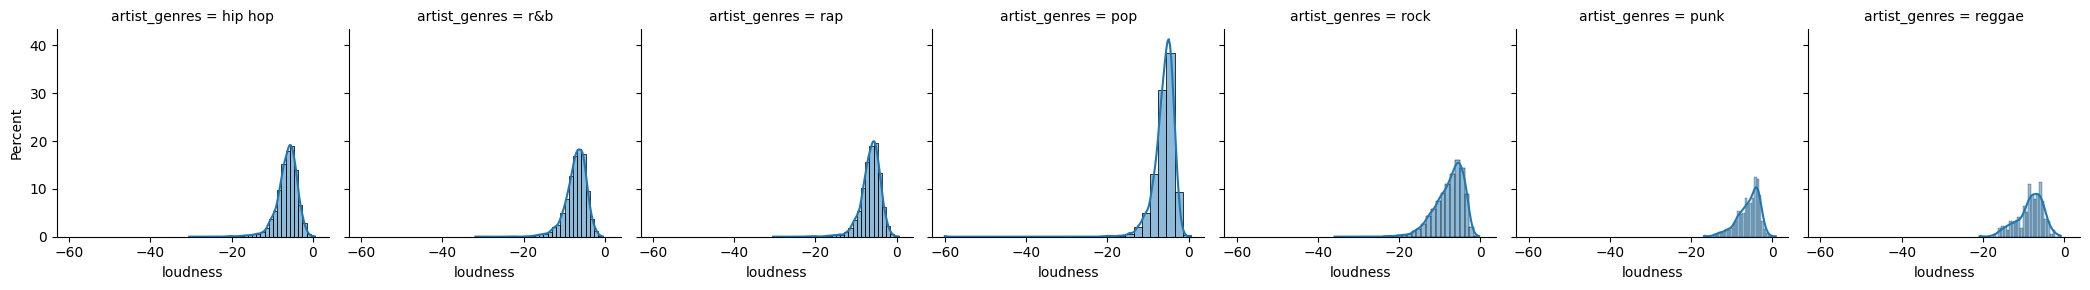

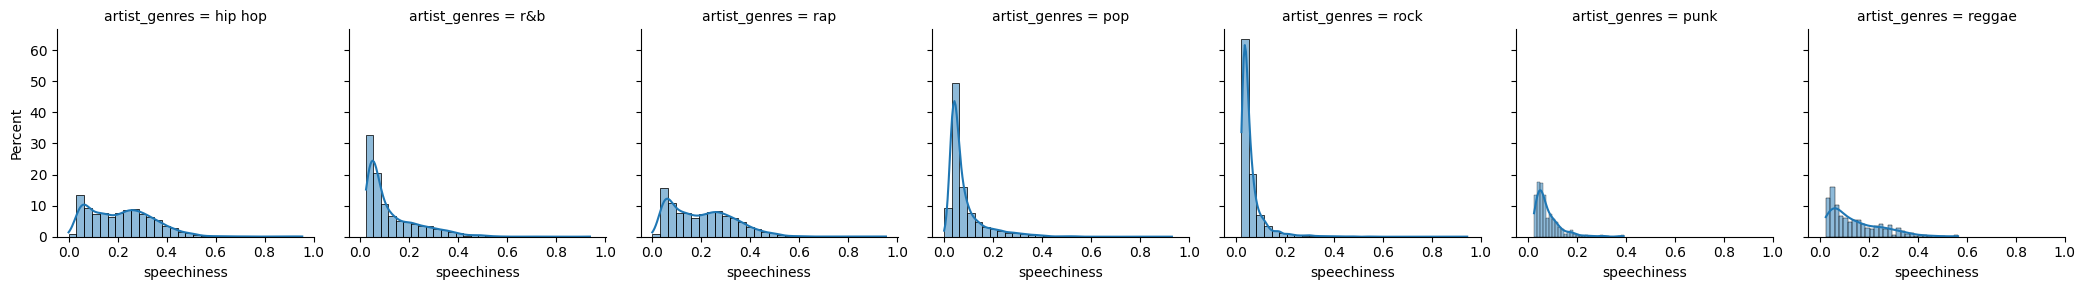

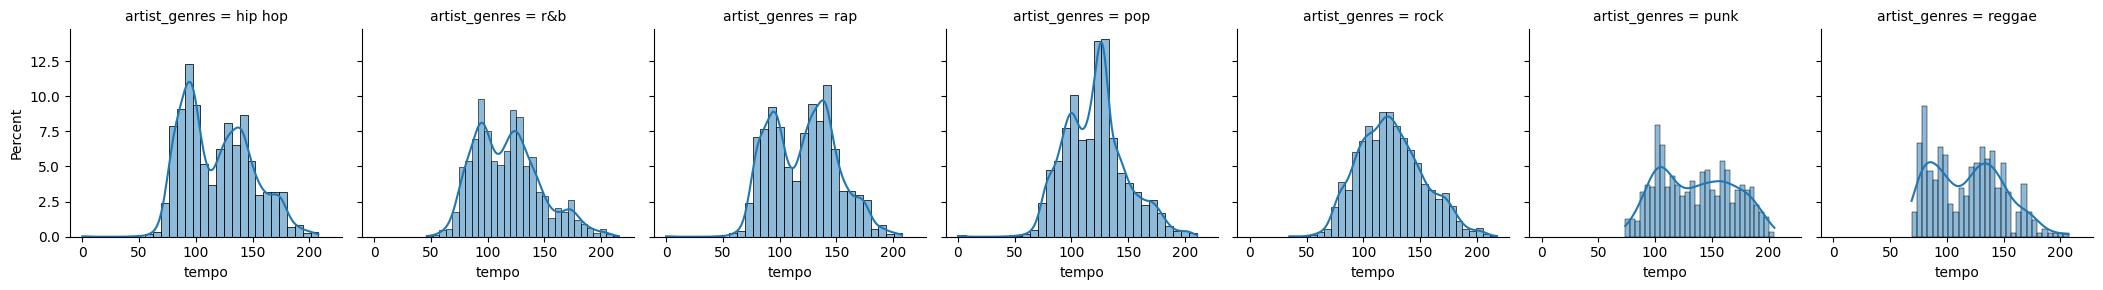

In [83]:
for feature in features:
    plt.rcParams['figure.figsize'] = (20,7)
    g = sns.FacetGrid(df_musicas, col='artist_genres')
    g.map(sns.histplot, feature, kde=True, bins=30, stat='percent')
    plt.show()

Como era de se esperar, cada gênero músical possui uma distribuição diferente para cada _feature_. Com destaque para Punk e Reggae, que possuem distribuições bem diferentes das demais em quase todas as _features_.

### 4.3 Tratamento de Outliers

Para cada feature, foi calculado o intervalo interquartil (IQR) e, em seguida, os valores que estavam fora desse intervalo foram considerados outliers e removidos.

In [ ]:
def remover_outliers_por_genero(df, coluna):
    # Conta quantas linhas tinha antes
    num_linhas_antes = df.shape[0]

    # Cálculo dos limites do intervalo interquartil (IQR) por gênero
    q1 = df.groupby('artist_genres')[coluna].quantile(0.25)
    q3 = df.groupby('artist_genres')[coluna].quantile(0.75)
    iqr = q3 - q1

    # Cálculo dos limites inferior e superior para determinar os outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Função para filtrar os outliers por gênero
    def filter_outliers_by_genre(group):
        genre = group.name
        return group[(group[coluna] >= lower_bound[genre]) & (group[coluna] <= upper_bound[genre])]

    # Aplicar a função de filtro aos grupos por gênero
    df_filtered = df.groupby('artist_genres').apply(filter_outliers_by_genre).reset_index(drop=True)

    # Conta quantas linhas tem depois
    num_linhas_depois = df_filtered.shape[0]

    # Calcula a diferença
    diferenca = num_linhas_antes - num_linhas_depois

    return df_filtered, diferenca

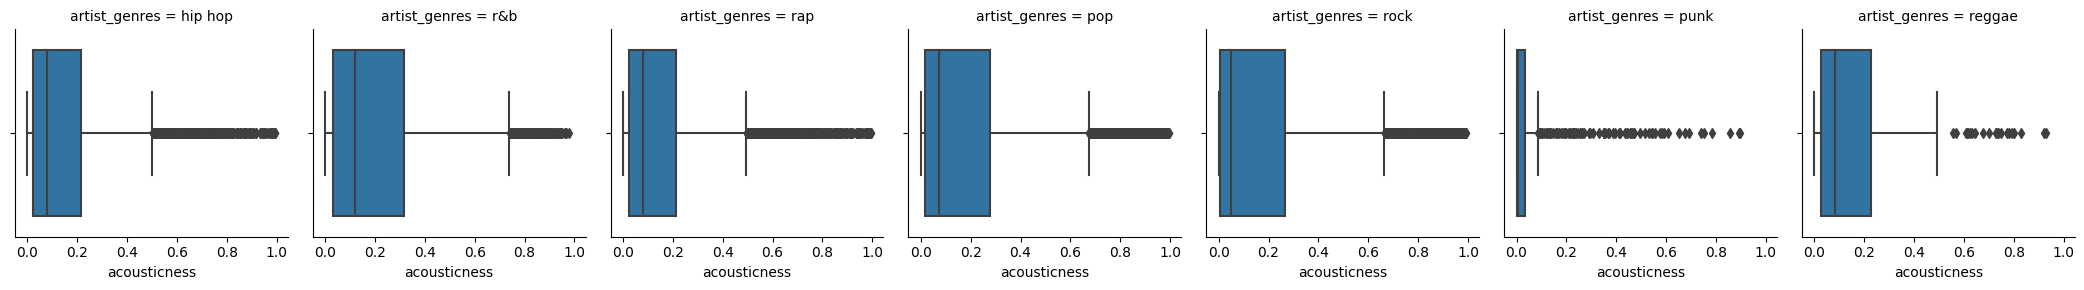

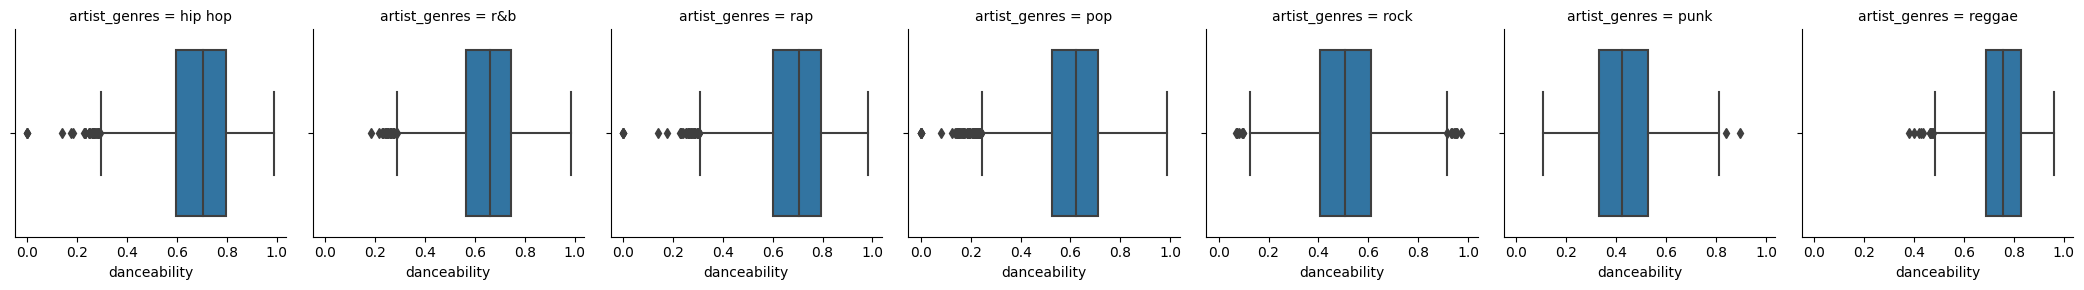

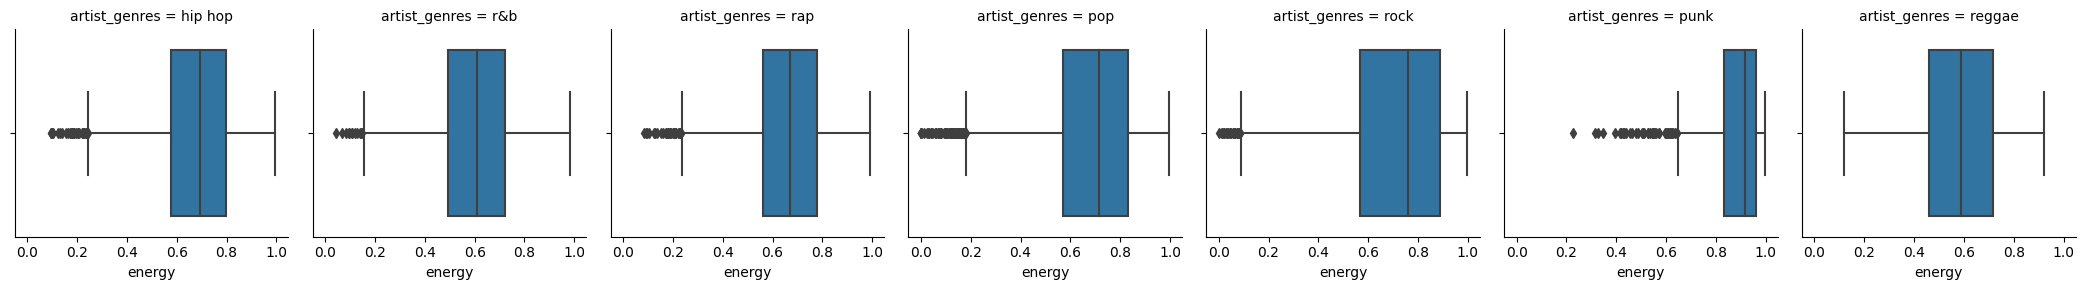

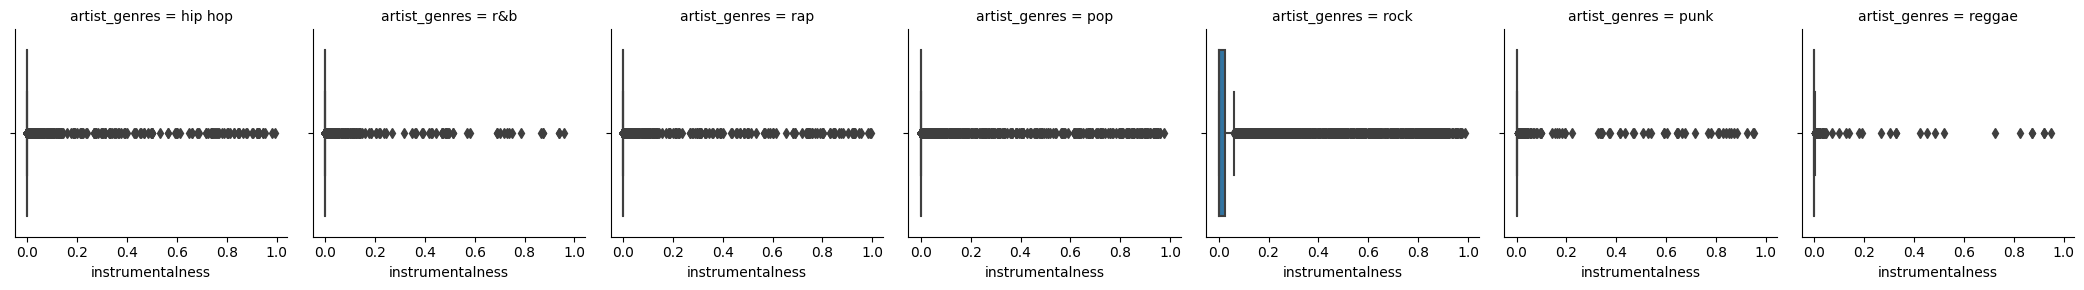

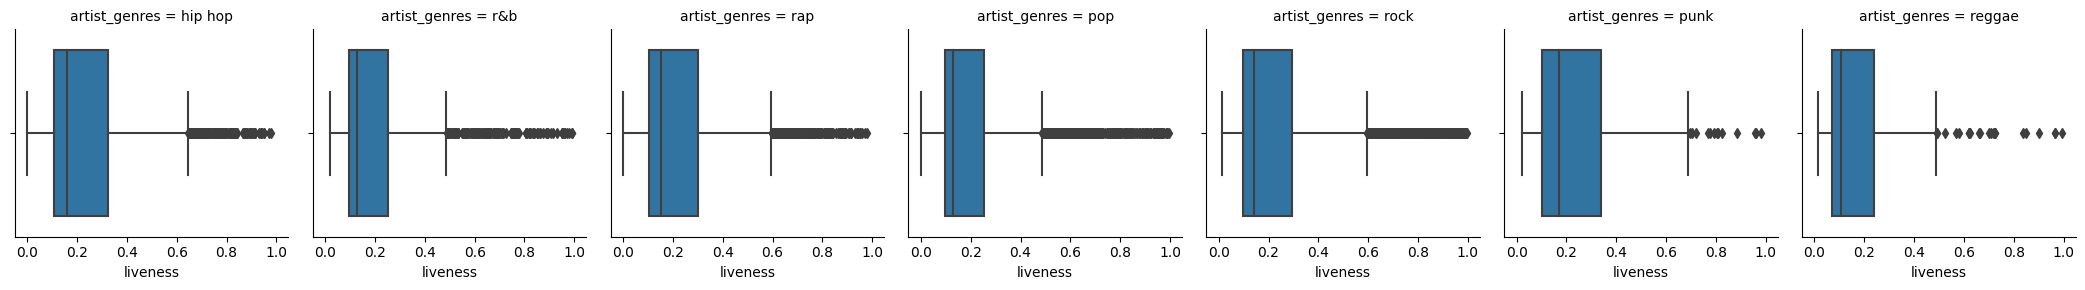

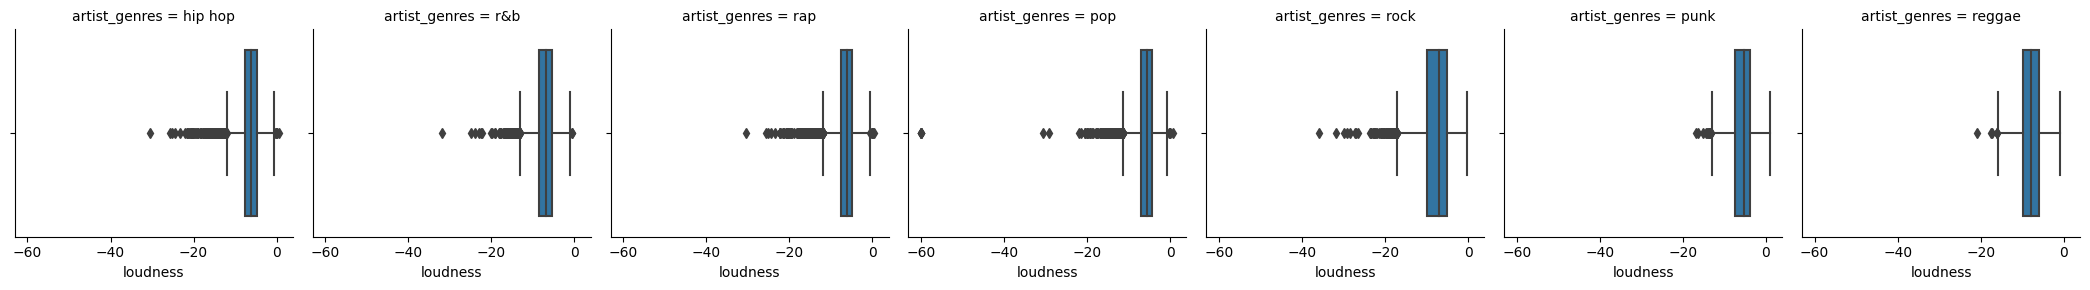

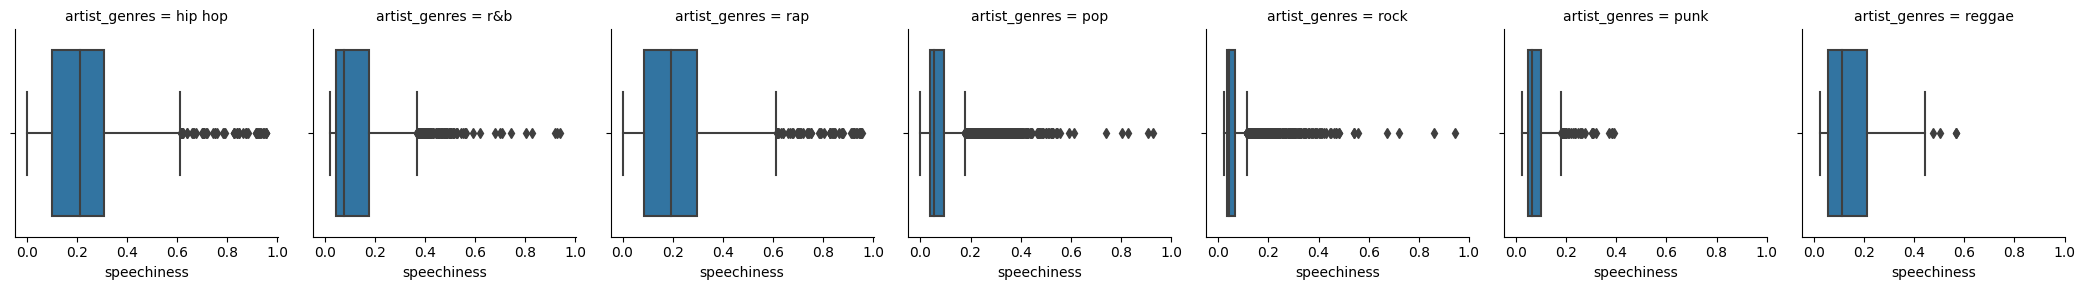

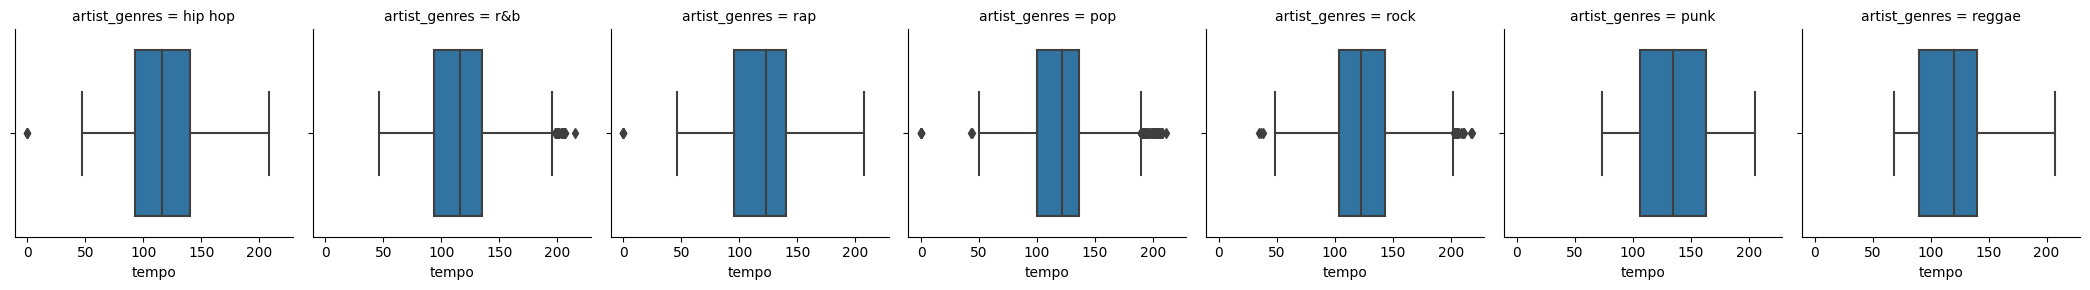

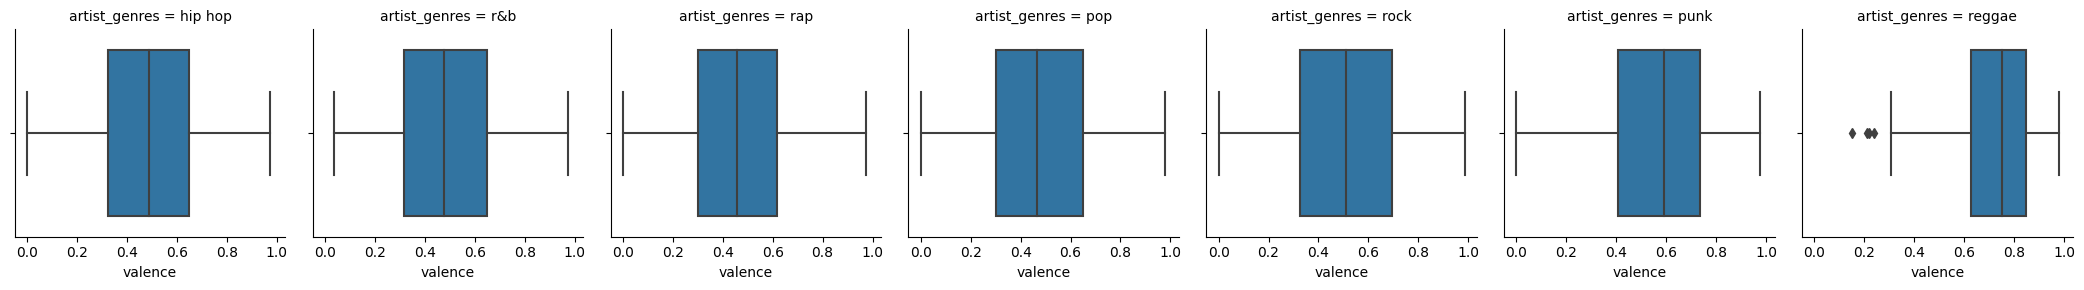

In [ ]:
# Para todas as colunas númericas, plota o boxplot por gênero

for feature in features:
    plt.rcParams['figure.figsize'] = (20,7)
    g = sns.FacetGrid(df_musicas, col='artist_genres')
    g.map(sns.boxplot, feature, order=df_musicas['artist_genres'].unique())
    plt.show()

In [ ]:
# Excluir os outliers de cada feature para cada gênero

df_musicas_sem_outliers = df_musicas.copy()
for feature in features:
    df_musicas_sem_outliers, num_linhas_removidas = remover_outliers_por_genero(df_musicas_sem_outliers, feature)
    print(f'Feature: {feature} - Linhas removidas: {num_linhas_removidas}')

# df_musicas_sem_outliers, num_linhas_removidas = remover_outliers_por_genero(df_musicas_sem_outliers, 'acousticness')
# print(f'Linhas removidas: {num_linhas_removidas}')


Feature: acousticness - Linhas removidas: 2086
Feature: danceability - Linhas removidas: 168
Feature: energy - Linhas removidas: 114
Feature: instrumentalness - Linhas removidas: 5493
Feature: liveness - Linhas removidas: 1001
Feature: loudness - Linhas removidas: 445
Feature: speechiness - Linhas removidas: 825
Feature: tempo - Linhas removidas: 85
Feature: valence - Linhas removidas: 6


Vamos ver como ficou a distribuição de cada variável após o tratamento de outliers.

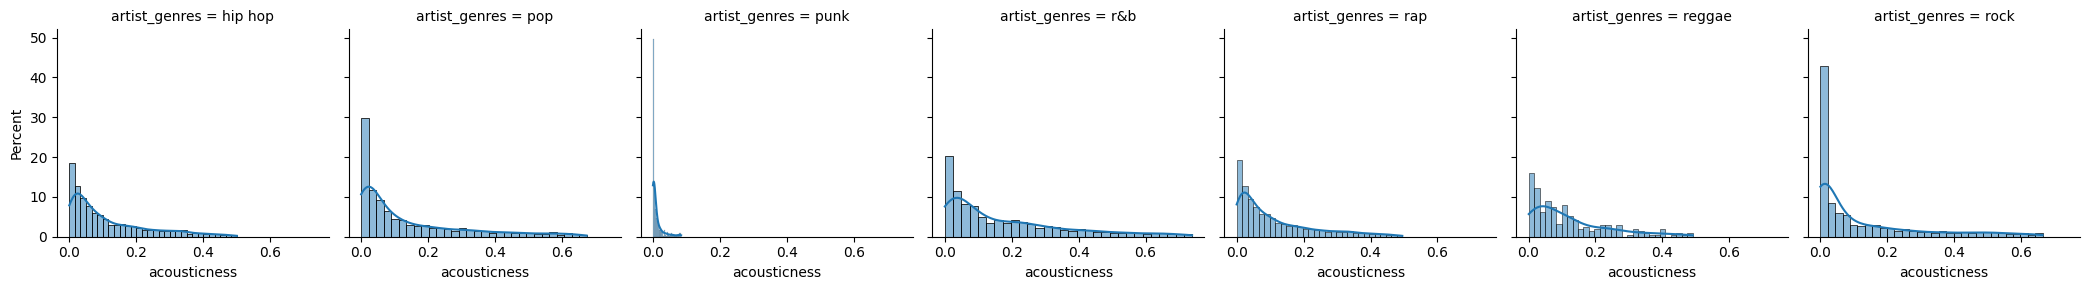

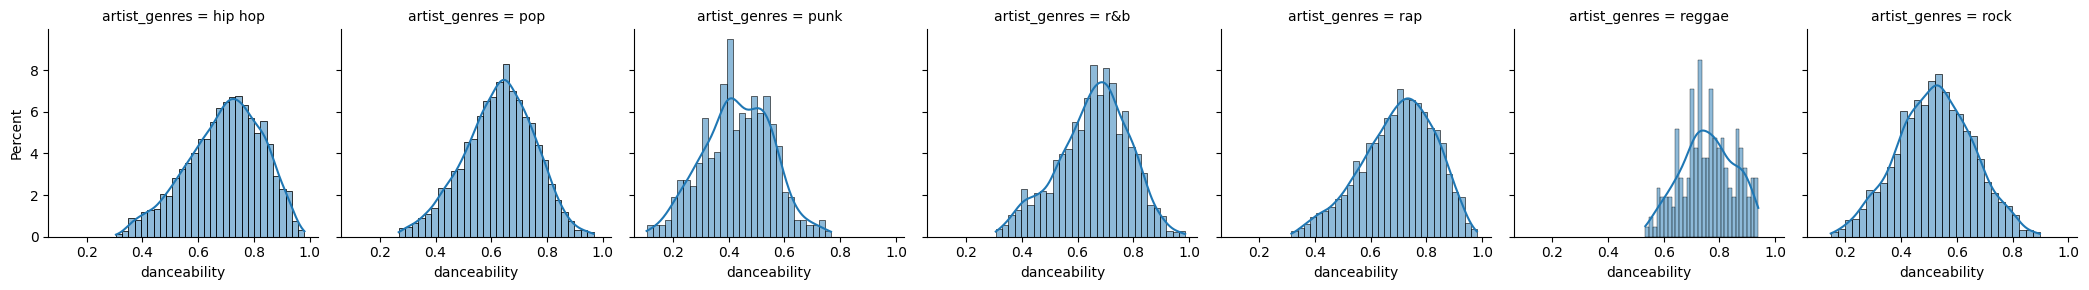

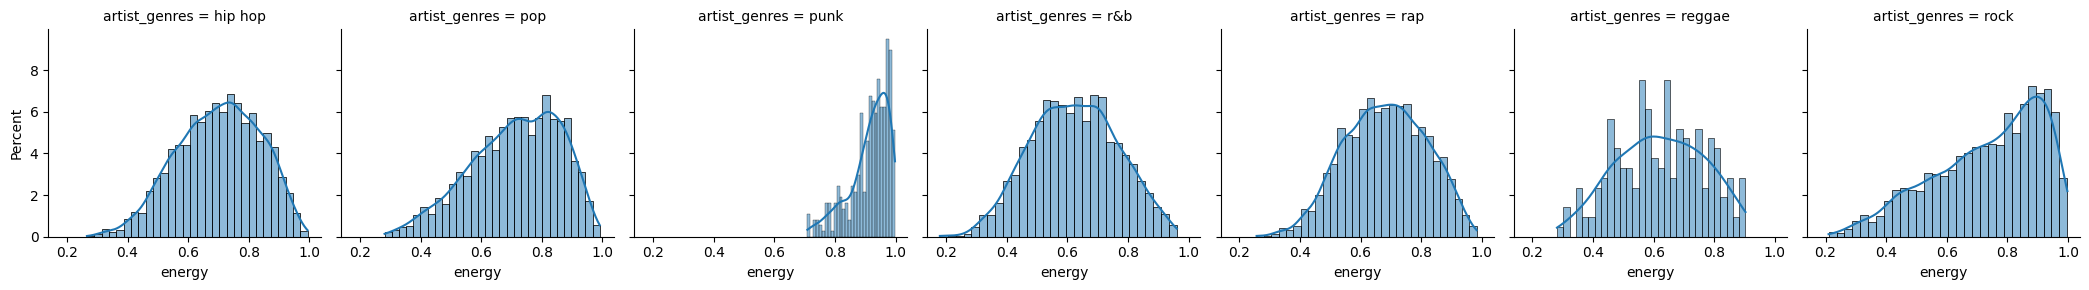

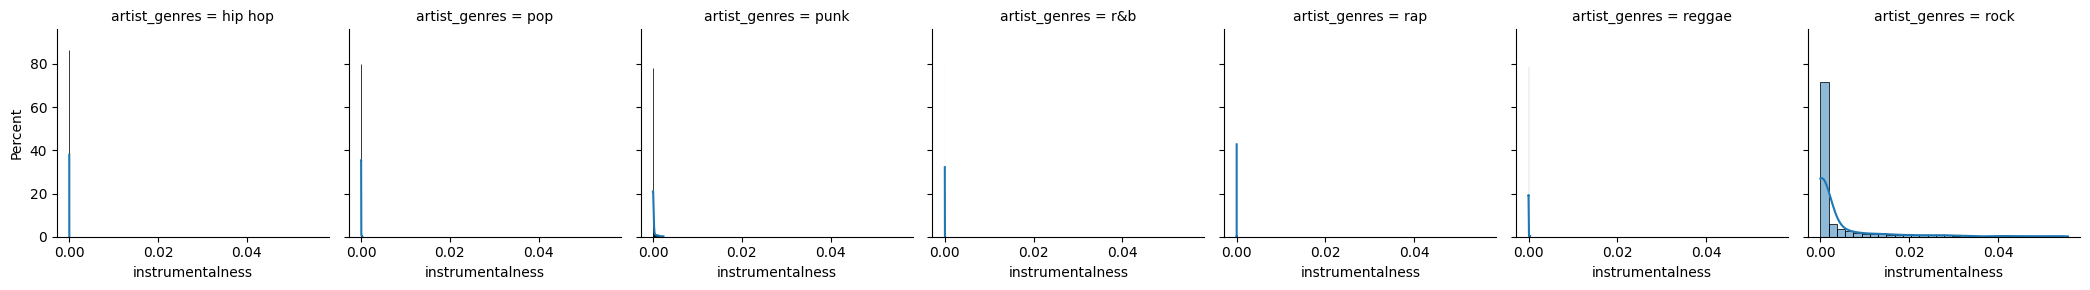

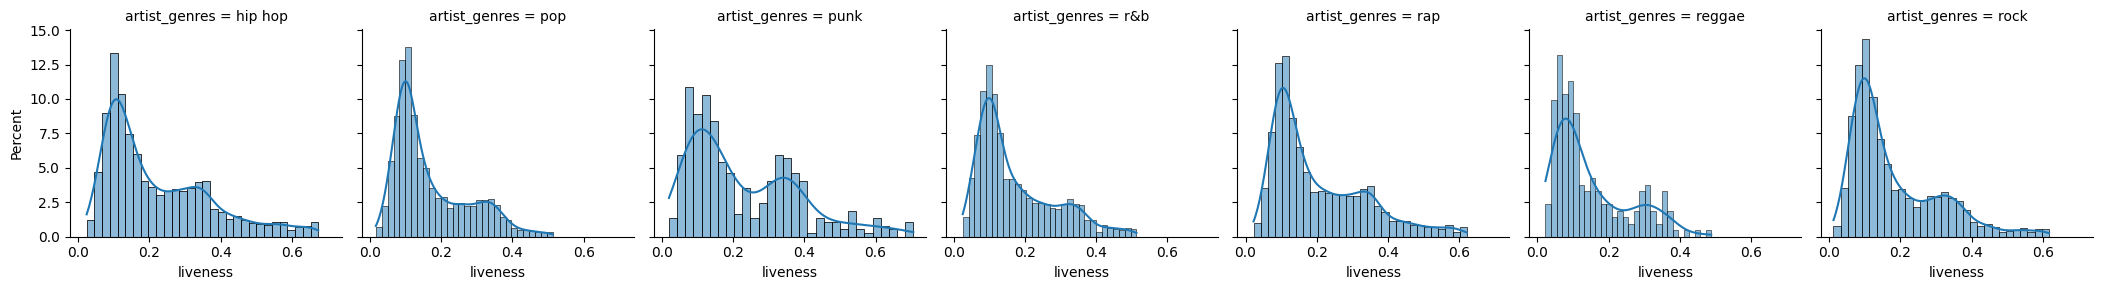

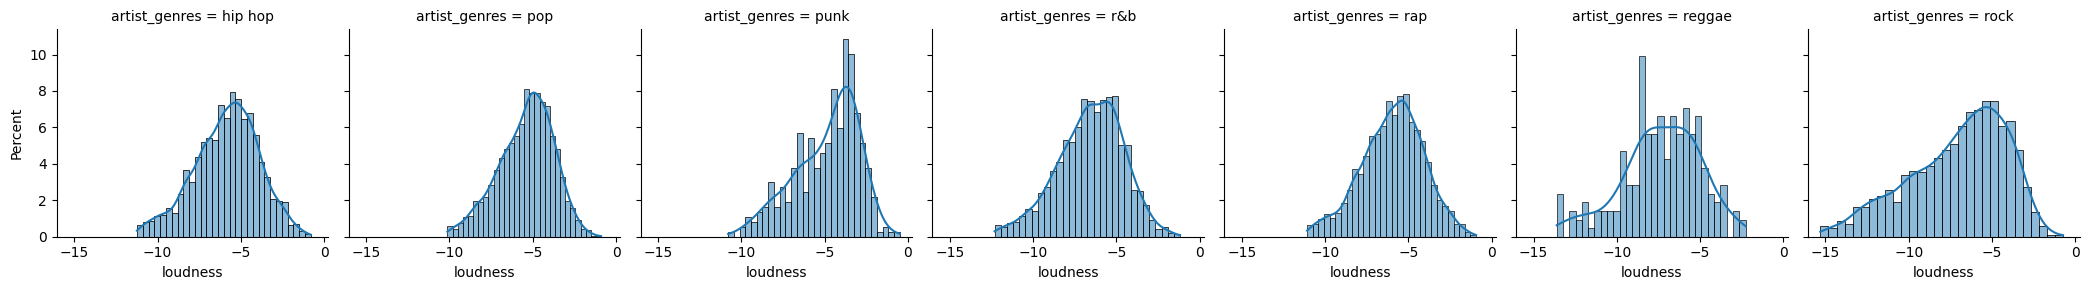

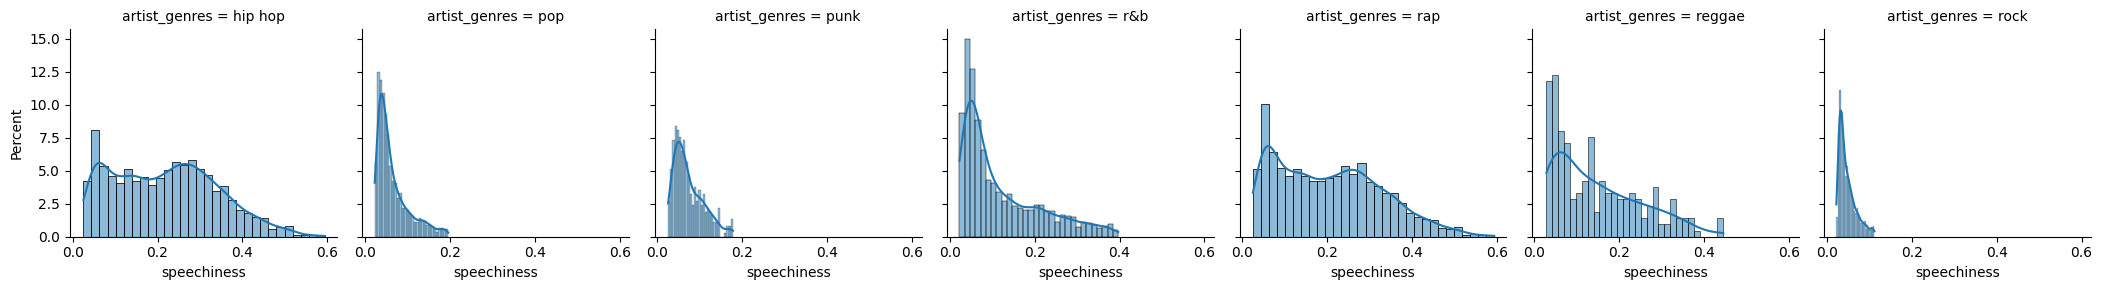

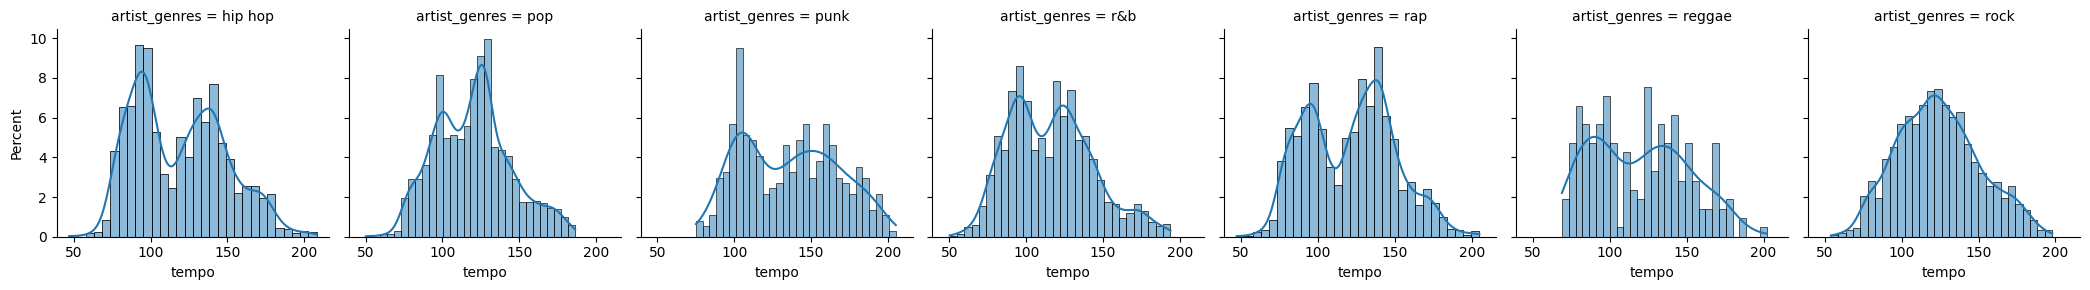

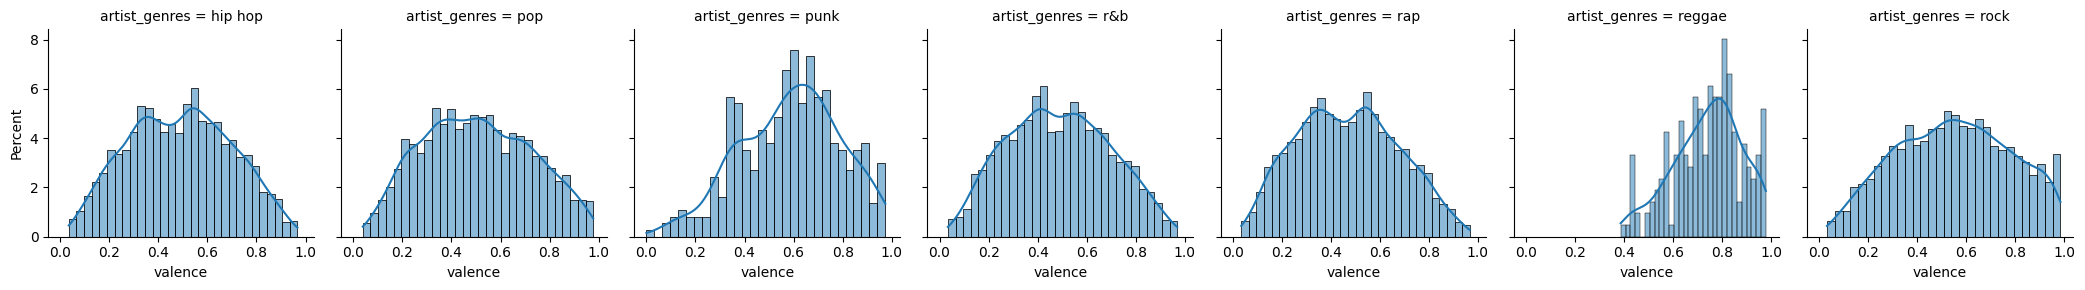

In [ ]:
# Para todas as colunas númericas, plota a distribuição por gênero

for feature in features:
    plt.rcParams['figure.figsize'] = (20,7)
    g = sns.FacetGrid(df_musicas_sem_outliers, col='artist_genres')
    g.map(sns.histplot, feature, kde=True, bins=30, stat='percent')
    plt.show()

## 5. Análise de Dados

1. Quais são os Top 1 artistas mais populares de cada gênero? Quais as características das músicas deles diferem da média do seu gênero?

2. Como foi a evolução do lançamento de músicas por gênero ao longo dos anos? Como foi a evolução das features (loudness, danceability) ao longo dos anos?

### 5.1 Quais são os Top 1 artistas mais populares de cada gênero? Quais as características das músicas deles diferem da média do seu gênero?

In [ ]:
# Pega o top 1 artista de cada genero, ordenado por popularidade

df_top_artists = df_musicas_sem_outliers.groupby(['artist_genres', 'artist_name']).max().sort_values(by=['artist_popularity'], ascending=False).reset_index().groupby('artist_genres').head(1)[['artist_name', 'artist_genres', 'artist_popularity']].reset_index(drop = True)
df_top_artists

,artist_name,artist_genres,artist_popularity
0,Taylor Swift,pop,100
1,Drake,hip hop,96
2,Drake,rap,96
3,SZA,r&b,90
4,Imagine Dragons,rock,88
5,Bob Marley & The Wailers,reggae,79
6,Green Day,punk,79


In [ ]:
# Faz a média de cada gênero por features 

df_means = df_musicas_sem_outliers.groupby('artist_genres').mean()[features].reset_index()
df_means['artist_name'] = 'Média'
df_means

,artist_genres,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,artist_name
0,hip hop,0.115281,0.694415,0.699494,5.699723e-07,0.223162,-5.871314,0.219031,119.084062,0.488953,Média
1,pop,0.138561,0.627524,0.712321,1.374562e-05,0.168499,-5.404185,0.065521,120.007686,0.505290,Média
2,punk,0.010628,0.431081,0.914238,1.533948e-04,0.230672,-4.872287,0.073578,135.858095,0.586829,Média
3,r&b,0.179425,0.656620,0.622730,2.757571e-06,0.172562,-6.573875,0.120208,116.250849,0.486823,Média
4,rap,0.112758,0.698409,0.681141,2.062103e-07,0.203539,-5.947532,0.205896,121.323015,0.469953,Média
5,reggae,0.120168,0.758231,0.622953,2.270335e-05,0.148338,-7.375038,0.147621,119.367014,0.742000,Média
6,rock,0.125438,0.521476,0.735931,4.360767e-03,0.182234,-7.067376,0.047579,124.163044,0.548152,Média


In [ ]:
# Pega o top 1 artista de cada genero, ordenado por popularidade e faz a média de cada feature

df_mean_top_artist = pd.DataFrame(columns=['artist_name'] + features)

for artist,genre in zip(df_top_artists['artist_name'],df_top_artists['artist_genres']):
    artist_mean = df_musicas_sem_outliers[df_musicas_sem_outliers['artist_name'] == artist][features].mean()
    artist_mean['artist_name'] = artist
    artist_mean['artist_genres'] = genre

    df_mean_top_artist = df_mean_top_artist.append(artist_mean, ignore_index=True)

df_mean_top_artist = df_mean_top_artist[~df_mean_top_artist['artist_name'].isna()]
df_mean_top_artist    

,artist_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,artist_genres
0,Taylor Swift,0.148626,0.602871,0.654629,0.00001,0.159485,-5.662629,0.046711,119.046758,0.42446,pop
1,Drake,0.122406,0.661216,0.638385,0.000001,0.209799,-6.656103,0.248689,121.995253,0.397304,hip hop
2,Drake,0.122406,0.661216,0.638385,0.000001,0.209799,-6.656103,0.248689,121.995253,0.397304,rap
3,SZA,0.220996,0.656,0.575043,0.000006,0.125893,-6.79113,0.123863,112.585978,0.374696,r&b
4,Imagine Dragons,0.121605,0.522853,0.710147,0.003583,0.181887,-6.064162,0.052175,125.719721,0.360819,rock
5,Bob Marley & The Wailers,0.14098,0.80363,0.501783,0.000043,0.092122,-9.080283,0.15462,116.071304,0.7545,reggae
6,Green Day,0.023131,0.467625,0.860563,0.000667,0.171279,-4.192854,0.054463,135.93225,0.6309,punk


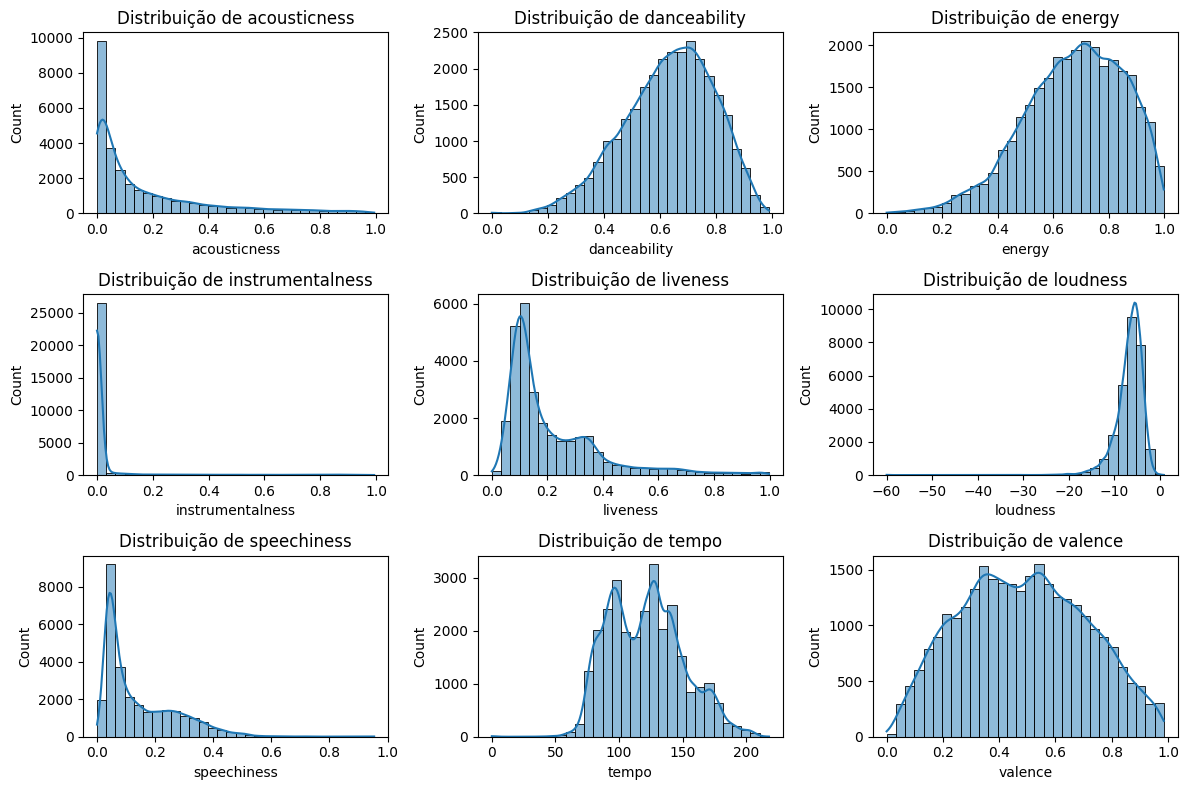

In [ ]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Criação da grid de subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, feature in enumerate(features):

    # Determinar o índice da subplot atual
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(
        df_musicas[feature], 
        kde=True,
        ax=axes[row_idx, col_idx],
        bins=30
        )
    
    axes[row_idx, col_idx].set_title(f'Distribuição de {feature}')


# Ajuste do espaçamento entre as subplots
plt.tight_layout()

# Exibição do gráfico
plt.show()

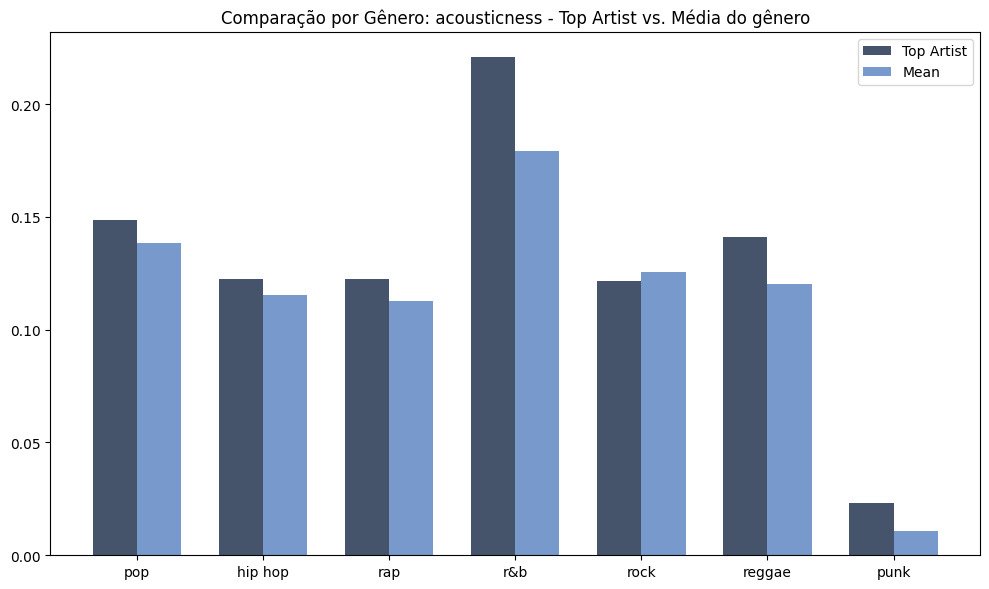

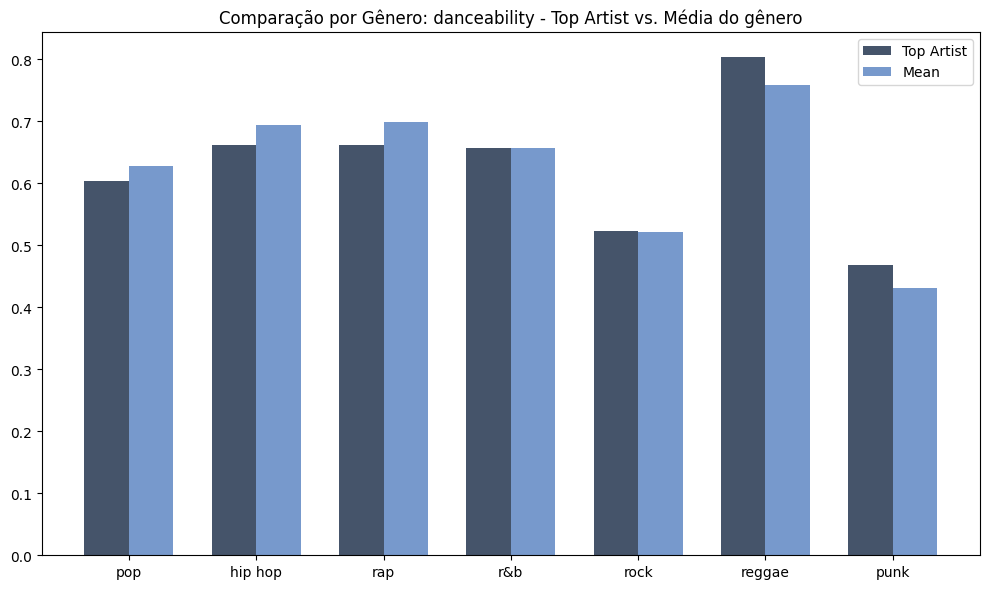

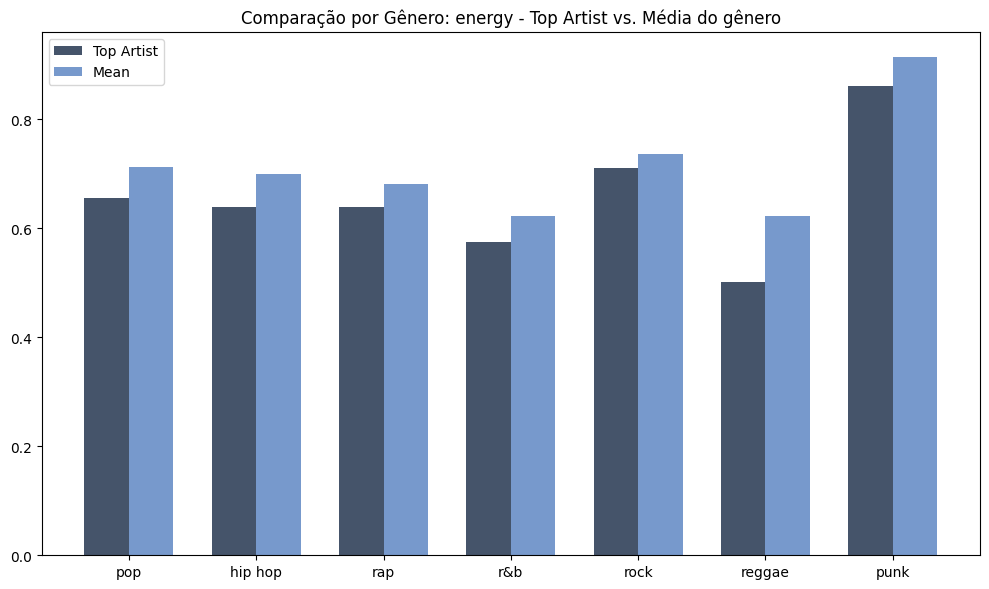

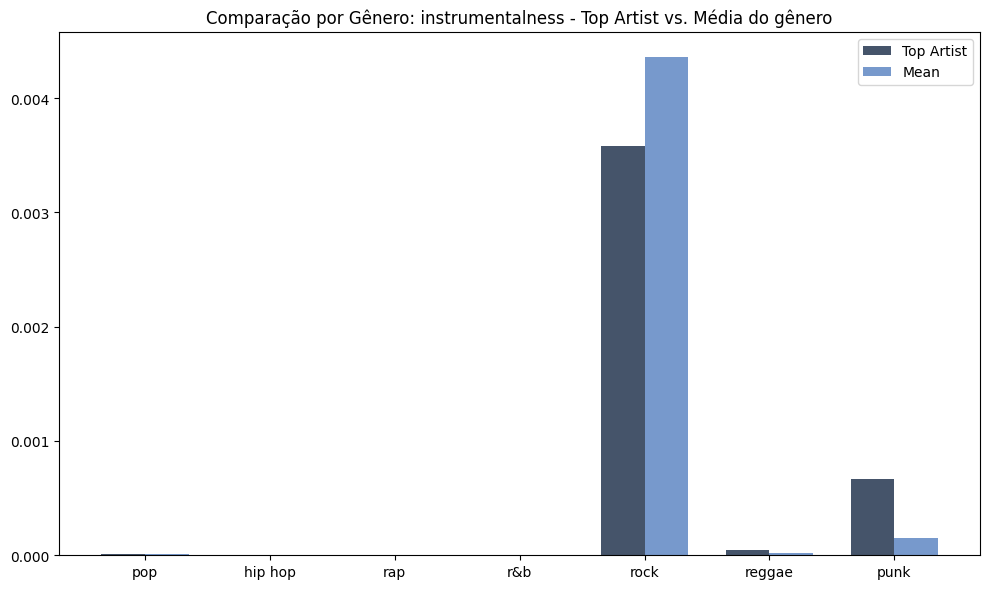

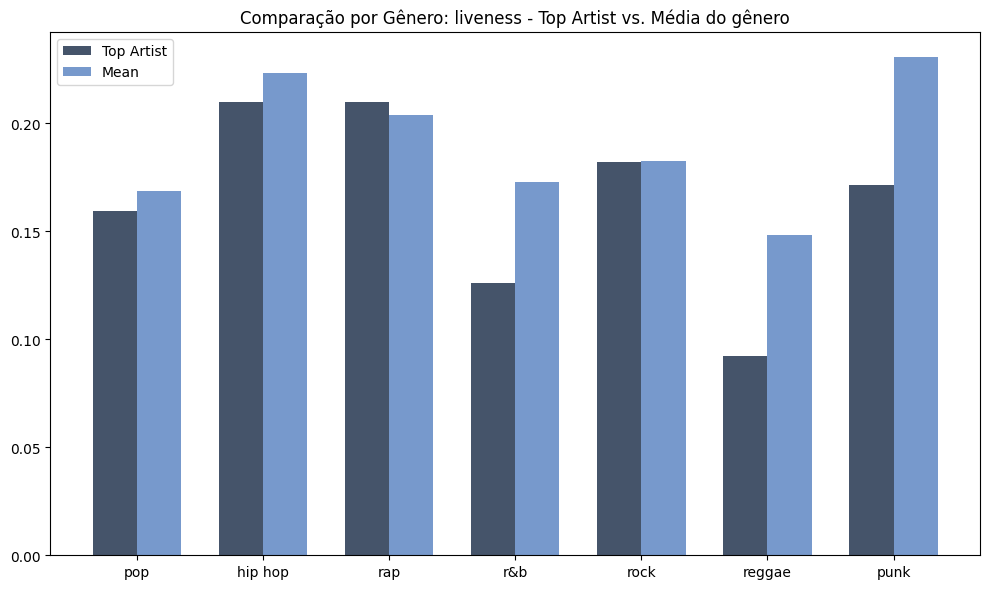

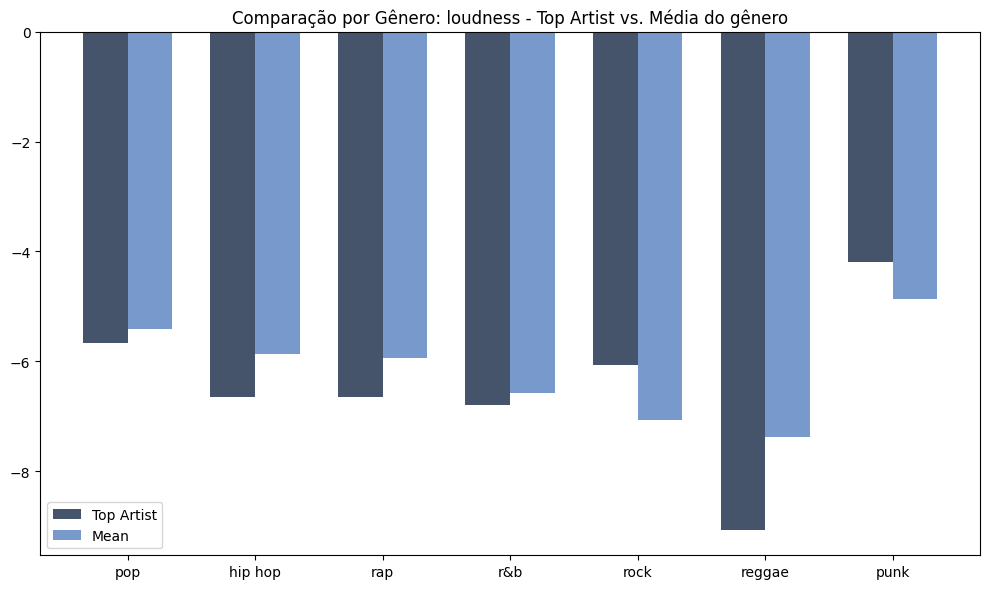

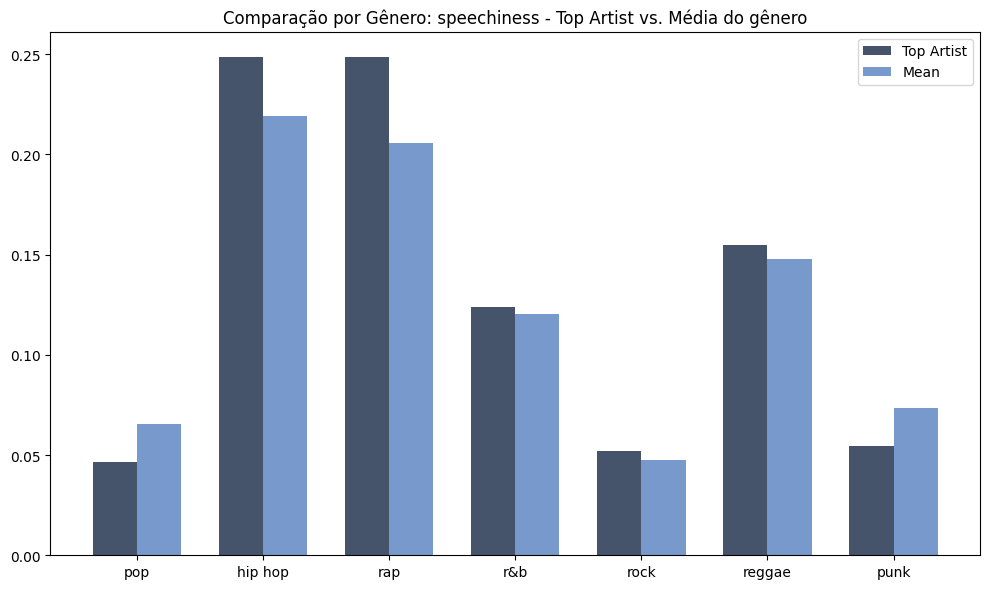

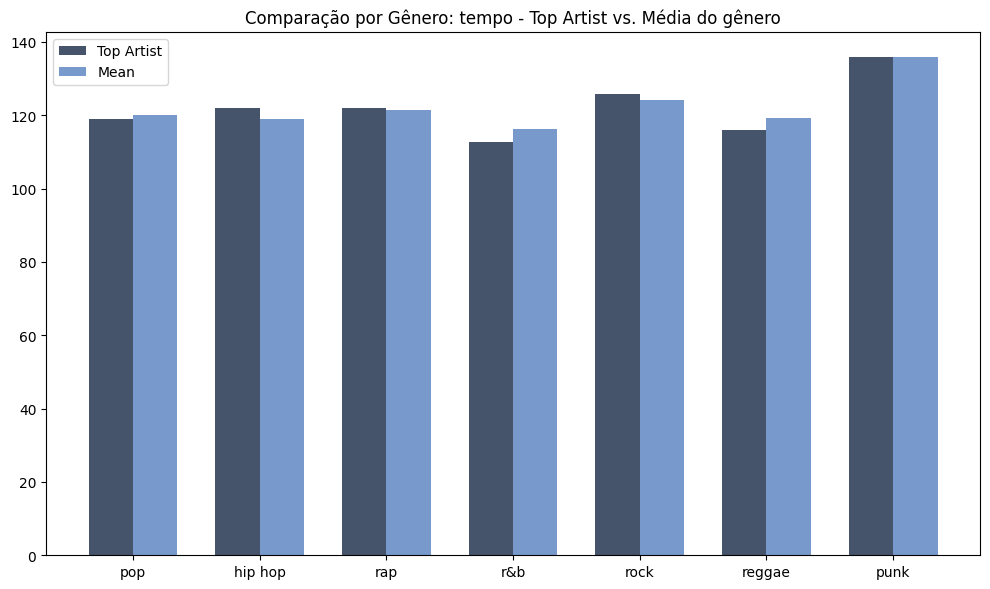

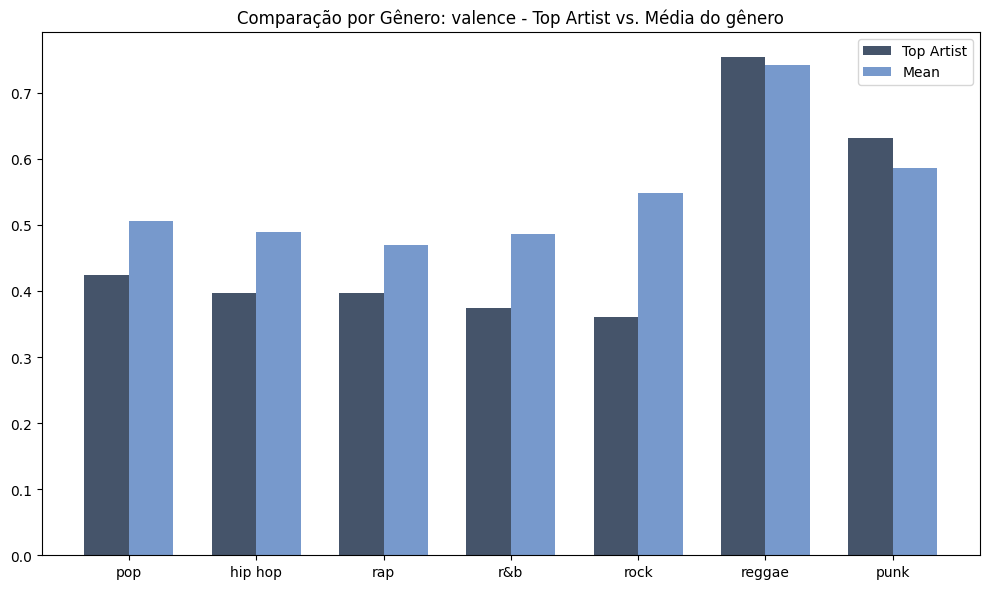

In [ ]:
# Filtrar as colunas relevantes nos dataframes
df_top_artist_genre = df_mean_top_artist[['artist_genres'] + features]
df_means_genre = df_means[['artist_genres'] + features]

colors = sns.dark_palette("#79C", 6)

# Iterar sobre as features e criar um gráfico para cada uma
for feature in features:
    # Merge entre os dataframes por gênero
    df_merged = pd.merge(df_top_artist_genre, df_means_genre, on='artist_genres', suffixes=('_top_artist', '_means'))

    # Configurar o gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar as barras de comparação
    width = 0.35  # Largura das barras
    x = list(range(len(df_merged)))  # Converter range em uma lista
    offset_top_artist = -width / 2
    offset_means = width / 2

    ax.bar([val + offset_top_artist for val in x], df_merged[feature + '_top_artist'], width, label='Top Artist', color = colors[2])
    ax.bar([val + offset_means for val in x], df_merged[feature + '_means'], width, label='Mean', color = colors[5])

    # Configurar os rótulos do eixo x
    ax.set_xticks(x)
    ax.set_xticklabels(df_merged['artist_genres'])

    # Configurar o título do gráfico
    ax.set_title(f'Comparação por Gênero: {feature} - Top Artist vs. Média do gênero')

    # Adicionar legenda
    ax.legend()
    ax.grid(False)


    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

### 5.2 Como foi a evolução do lançamento de músicas por gênero ao longo dos anos? Como foi a evolução das features (loudness, danceability) ao longo dos anos?

## 6. Referências

[Documentação do Pandas](https://pandas.pydata.org/docs/index.html)

[Documentação do Seaborn](https://seaborn.pydata.org/index.html)

[Documentação do Matplotlib](https://matplotlib.org/ )

[Documentação do Numpy](https://numpy.org/)

[Spotify Music Data Analysis](https://medium.com/analytics-vidhya/spotify-music-data-analysis-part-1-c8457bfc53a)

[Spotify Data Visualization and Analysis using Python](https://medium.com/geekculture/spotify-data-visualization-and-analysis-using-python-4af81c5531a7)

